<font size="+5">#02. Machine Learning & Linear Regression</font>

# Load the Data

> - Simply execute the following lines of code to load the data.
> - This dataset contains **statistics about Car Accidents** (columns)
> - In each one of **USA States** (rows)

In [2]:
import seaborn as sns

df = sns.load_dataset(name='car_crashes', index_col='abbrev')
df.sample(10)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
NC,16.8,6.552,5.208,15.792,13.608,708.24,127.82
MD,12.5,4.250,4.000,8.875,12.375,1048.78,192.70
LA,20.5,7.175,6.765,14.965,20.090,1281.55,194.78
MO,16.1,6.923,5.474,14.812,13.524,790.32,144.45
OH,14.1,3.948,4.794,13.959,11.562,697.73,133.52
DE,16.2,6.156,4.860,14.094,16.038,1137.87,151.48
GA,15.6,2.964,3.900,14.820,14.508,913.15,142.80
CO,13.6,5.032,3.808,10.744,12.920,835.50,139.91
RI,11.1,3.774,4.218,10.212,8.769,1148.99,148.58


In [3]:
df.mean()

total              15.790196
speeding            4.998196
alcohol             4.886784
not_distracted     13.573176
no_previous        14.004882
ins_premium       886.957647
ins_losses        134.493137
dtype: float64

In [4]:
for i in df:
    suma = sum(df[i])
    n_personas = len(df[i])
    
    media = suma/n_personas
    print(media)

15.79019607843137
4.998196078431373
4.88678431372549
13.573176470588232
14.004882352941172
886.9576470588232
134.49313725490197


# Data Visualization to Analyize Patterns

> Choose two variables that have a relationship. For example, would the `total` number of accidents **increase** if alcohol also increases?
> As the 2 variables are **numerical**, visualize the data with a `scatterplot()`.
> 
> - Is there a figure that can represents the relationship between these 2 variables? Which one?

<AxesSubplot:xlabel='alcohol', ylabel='total'>

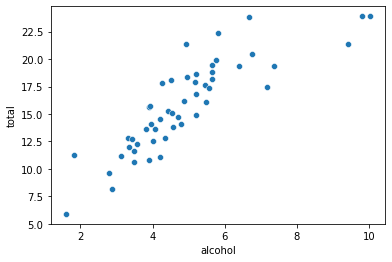

In [5]:
sns.scatterplot(x='alcohol',y='total',data=df)

# Machine Learning, what does it mean?

> - The Machine Learns...
>
> But, **what does it learn?**

In [6]:
%%HTML
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Machine Learning, what does it mean? ⏯<br><br>· The machine learns...<br><br>Ha ha, not funny! 🤨 What does it learn?<br><br>· A mathematical equation. For example: <a href="https://t.co/sjtq9F2pq7">pic.twitter.com/sjtq9F2pq7</a></p>&mdash; Jesús López (@sotastica) <a href="https://twitter.com/sotastica/status/1449735653328031745?ref_src=twsrc%5Etfw">October 17, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

# How does the Machine Learn?

## In a Linear Regression

In [7]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/Ht3rYS-JilE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## In a Neural Network

In [8]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/IHZwWFHWa-w?start=36" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

A Practical Example → [Tesla Autopilot](https://www.tesla.com/AI)

An Example where It Fails → [Tesla Confuses Moon with Semaphore](https://twitter.com/Carnage4Life/status/1418920100086784000?s=20)

# `LinearRegression()` Model in Python

## Build the Model

> 1. **Necesity**: Build Model
> 2. **Google**: How do you search for the solution?
> 3. **Solution**: Find the `function()` that makes it happen

## Code Thinking

> Which function computes the Model?
> - `fit()`
>
> How could can you **import the function in Python**?

In [9]:
df

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
AZ,18.6,6.510,5.208,15.624,17.856,899.47,110.35
AR,22.4,4.032,5.824,21.056,21.280,827.34,142.39
CA,12.0,4.200,3.360,10.920,10.680,878.41,165.63
CO,13.6,5.032,3.808,10.744,12.920,835.50,139.91
CT,10.8,4.968,3.888,9.396,8.856,1068.73,167.02
DE,16.2,6.156,4.860,14.094,16.038,1137.87,151.48
DC,5.9,2.006,1.593,5.900,5.900,1273.89,136.05


In [10]:
fit()

NameError: name 'fit' is not defined

`algo.fit()`

In [11]:
algo.fit()

NameError: name 'algo' is not defined

`algo = ?`

In [12]:
algo = LinearRegression()

NameError: name 'LinearRegression' is not defined

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
algo = LinearRegression()

In [22]:
algo.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False}

In [23]:
algo.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

### Separate Variables for the Model

> Regarding their role:
> 1. **Target Variable `y`**
>
> What would you like **to predict**?
>
> Total number of accients? Or Alcohol?
>
> 2. **Explanatory Variable `X`**
>
> Which variable will you use **to explain** the target?

In [24]:
explanatory = df[['alcohol']]
target = df['total']

### Finally `fit()` the Model

In [25]:
algo.fit(X=explanatory, y=target)

LinearRegression()

In [26]:
algo.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.0325063]),
 '_residues': 231.96888653310057,
 'rank_': 1,
 'singular_': array([12.22681605]),
 'intercept_': 5.8577761548263005}

## Model's Mathematical Equation

> A model is nothing more than a mathematical equation that **helps you to calculate** something. For example:
>
> 1. **Churn**: which is the probability for this client not to buy me anymore?
> 2. **Credit Approval**: which is the probability for this client to pay the credit?
> 3. **Athlete's Injury**: which is the probability for this athlete to have an injury in the next game?
> 4. **Car Rental**: how many cars will people rent tomorrow?
>
> For our case: **how many accidents** the State will have (based on alcohol)?
> - Which is the mathematical equation?

$$
accidents = 5.85 + 2.03 \cdot alcohol
$$

## Model Interpretation

> - How many accidents will happen for every **one unit increase in alcohol**?

## External Code Execution

> - What have happened **inside the computer** to get the model equation?

## Calculate a Prediction with the Model

> **Programming thiking:**
>
> - Which `function()` can we use to make a prediction?
> - How can you answer yourself **without searching in Google**?

## Model Visualization

> 1. What would happend if you **plot the predictions**?
> 2. And the **real data**?

# How good is my model? **Goodness of Fit**

> - How can we compare **reality vs. predictions**?

# Other Regression Models to Calculate Accidents

> Tutorial → [Why All Machine Learning Models Are the Same](https://blogsotastico.com/why-all-machine-learning-models-are-the-same)

## `RandomForestRegression()`

In [27]:
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor()

In [28]:
import seaborn as sns
sns.load_dataset('mpg')
df=sns.load_dataset('mpg')


In [29]:
model3.fit(X=df[['weight']],y=df['mpg'])

RandomForestRegressor()

In [30]:
model3.__dict__

{'base_estimator': DecisionTreeRegressor(),
 'n_estimators': 100,
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'random_state',
  'ccp_alpha'),
 'bootstrap': True,
 'oob_score': False,
 'n_jobs': None,
 'random_state': None,
 'verbose': 0,
 'warm_start': False,
 'class_weight': None,
 'max_samples': None,
 'criterion': 'squared_error',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['weight'], dtype=object),
 'n_features_in_': 1,
 'n_outputs_': 1,
 'base_estimator_': DecisionTreeRegressor(),
 'estimators_': [DecisionTreeRegressor(max_features='auto', random_state=2033372129),
  DecisionTreeRegressor(max_features='auto', random_state=1906653777),
  DecisionTreeRe

In [31]:
model3.predict(X=df[['weight']])
pred=model3.predict(X=df[['weight']])

In [32]:
pred

array([18.043     , 15.2875    , 17.2       , 16.2       , 17.112     ,
       15.099     , 14.433     , 14.39      , 13.83      , 15.515     ,
       17.074     , 15.716     , 14.72      , 16.533     , 26.128     ,
       21.933     , 19.117     , 22.458     , 34.25977976, 32.589     ,
       25.31266667, 27.55833333, 25.018     , 26.7       , 22.962     ,
       10.59      , 11.995     , 12.72      , 10.67      , 34.25977976,
       27.88341905, 24.619     , 28.45166667, 22.54133333, 16.682     ,
       17.37      , 18.61      , 17.98      , 14.95585714, 13.581     ,
       14.675     , 13.79      , 12.        , 12.71      , 12.29      ,
       19.377     , 21.13657143, 18.014     , 17.94      , 24.33542857,
       26.07233333, 31.427     , 31.542     , 32.528     , 34.21      ,
       29.43608333, 26.90833333, 23.752     , 27.87566667, 24.36      ,
       21.13657143, 22.85042857, 13.75      , 13.295     , 15.105     ,
       14.465     , 15.512     , 11.62      , 12.99733333, 12.99

In [33]:
dfsel = df[['weight', 'mpg']].copy()

In [34]:
dfsel['pred_rfr'] = pred

In [41]:
dfsel.index = df.name

In [50]:
dfsel.sample(10)

,weight,mpg,pred_rfr
name,,,
ford torino,3449,17.0,17.112000
honda civic cvcc,1800,36.1,35.758000
mazda glc custom l,2025,37.0,35.751333
saab 99gle,2795,21.6,22.989000
toyota mark ii,2930,19.0,21.551133
dodge d100,3755,13.0,14.516000
volkswagen 411 (sw),2511,22.0,22.350000
chevrolet vega,2542,25.0,27.711250
buick century,3907,17.0,18.245000


In [54]:
error = dfsel.mpg - dfsel.pred_rfr

In [57]:
error2 = error**2

In [60]:
rss = error2.sum()

In [61]:
rss

2055.617648793172

In [62]:
dfsel.mpg

name
chevrolet chevelle malibu    18.0
buick skylark 320            15.0
plymouth satellite           18.0
amc rebel sst                16.0
ford torino                  17.0
                             ... 
ford mustang gl              27.0
vw pickup                    44.0
dodge rampage                32.0
ford ranger                  28.0
chevy s-10                   31.0
Name: mpg, Length: 398, dtype: float64

In [66]:
tss = ((dfsel.mpg - dfsel.mpg.mean())**2).sum()

In [67]:
rss

2055.617648793172

In [68]:
tss

24252.575477386938

In [70]:
rss/tss

0.08475873627152822

In [72]:
1 - rss/tss

0.9152412637284718

In [74]:
model3.score(X=df[['weight']],y=df['mpg'])

0.9152412637284718

In [80]:
model3

RandomForestRegressor()

In [77]:
algo = LinearRegression()

In [78]:
algo.fit(X=df[['weight']],y=df['mpg'])

LinearRegression()

In [81]:
algo

LinearRegression()

In [79]:
algo.score(X=df[['weight']],y=df['mpg'])

0.6917929800341573

In [84]:
dfsel['pred_lr'] = algo.predict(X=df[['weight']])

In [85]:
dfsel

,weight,mpg,pred_rfr,pred_lr
name,,,,
chevrolet chevelle malibu,3504,18.0,18.043000,19.418523
buick skylark 320,3693,15.0,15.287500,17.967643
plymouth satellite,3436,18.0,17.200000,19.940532
amc rebel sst,3433,16.0,16.200000,19.963562
ford torino,3449,17.0,17.112000,19.840736
...,...,...,...,...
ford mustang gl,2790,27.0,24.749000,24.899622
vw pickup,2130,44.0,34.259780,29.966185
dodge rampage,2295,32.0,31.264750,28.699544


<AxesSubplot:xlabel='weight', ylabel='mpg'>

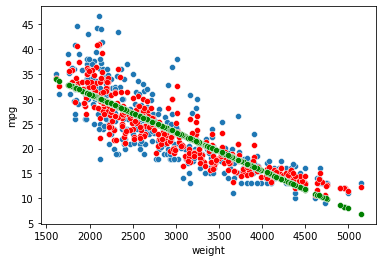

In [86]:
sns.scatterplot(x='weight', y='mpg', data=df)
sns.scatterplot(x='weight', y='pred_rfr', data=dfsel, color='red')
sns.scatterplot(x='weight', y='pred_lr', data=dfsel, color='green')

## `SVR()`

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
clf = RandomForestClassifier()

In [90]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [91]:
clf.fit(X=df[['weight']],y=df['origin'])

RandomForestClassifier()

In [94]:
dfsel_clf = df[['weight', 'origin']].copy()

In [97]:
dfsel_clf['pred'] = clf.predict(X=df[['weight']])

In [98]:
dfsel_clf

,weight,origin,pred
0,3504,usa,usa
1,3693,usa,usa
2,3436,usa,usa
3,3433,usa,usa
4,3449,usa,usa
...,...,...,...
393,2790,usa,usa
394,2130,europe,japan
395,2295,usa,usa
396,2625,usa,usa


In [99]:
dfsel_clf.origin == dfsel_clf.pred

0       True
1       True
2       True
3       True
4       True
       ...  
393     True
394    False
395     True
396     True
397     True
Length: 398, dtype: bool

In [102]:
aciertos = dfsel_clf.origin == dfsel_clf.pred

In [103]:
(dfsel_clf.origin == dfsel_clf.pred).sum()

379

In [107]:
dfsel_clf[~aciertos]

,weight,origin,pred
49,2220,usa,europe
52,2065,europe,japan
102,1950,europe,japan
114,2265,europe,japan
132,2542,usa,japan
179,2945,europe,usa
205,2155,japan,usa
219,2300,usa,europe
243,2720,japan,usa
244,1985,europe,japan


In [106]:
dfsel_clf[aciertos]

,weight,origin,pred
0,3504,usa,usa
1,3693,usa,usa
2,3436,usa,usa
3,3433,usa,usa
4,3449,usa,usa
...,...,...,...
392,2950,usa,usa
393,2790,usa,usa
395,2295,usa,usa
396,2625,usa,usa


In [89]:
clf.fit(X=df[['weight']],y=df['mpg'])

ValueError: Unknown label type: 'continuous'